**AI-Powered Titanic Survival Analysis**

Identifying and Predicting the Key Drivers Passenger Survival

**Introduction**

What determined who survived the Titanic disaster?

- Was survival influenced primarily by gender, passenger class, or age?
- Did wealth, reflected by ticket fare, increase survival chances?
- Did traveling with family improve or reduce survival probability?
- Can survival outcomes be predicted using structured passenger data?

In this analysis, we examine the Titanic dataset to uncover the demographic and socioeconomic factors that most influenced passenger survival. Using Python for data cleaning, feature engineering, exploratory data analysis (EDA),visualization, and predictive modeling, we identify and quantify the key survival patterns.

To enhance insight generation, aggregated statistics are also provided to a Large Language Model (LLM) to simulate AI-assisted analytical interpretation.

The dataset contains 891 passenger records, including demographic information, ticket class, fare, and survival outcomes.

**Table of Content**

  - Asking Questions
  - Data Wrangling
  - Feature Engineering
  - Exploratory Data Analysis
  - AI-Assisted Insights
  - Predictive Modeling
  - Conclusions
  - Limitations

**Asking Questions**

Based on the dataset, we aim to answer:

Q1: Did gender significantly influence survival rates?

Q2: How did passenger class (Pclass) affect survival probability?

Q3: Were children prioritized during evacuation?

Q4: Did higher ticket fares correlate with higher survival rates?

Q5: How did family size impact survival outcomes?

Q6: Can survival be predicted using structured passenger features?

**Data Wrangling**

  - Inspected dataset structure and missing values
  - Imputed missing Age values using median
  - Filled missing Embarked values with mode
  - Dropped Cabin due to excessive missing data
  - Verified data types and consistency

**Import Libraries and Load Data**

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")


# LOAD DATA
df = pd.read_csv("train.csv")

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data Overview**

In [2]:
# Dataset shape
df.shape

# Data types and missing values
df.info()

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check Missing Values**

In [3]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


**Data Cleaning**

Handle Missing Age (Median Imputation)

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)

Handle Missing Embarked

In [5]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

Drop Cabin (Too Many Missing Values)

In [6]:
df.drop(columns=['Cabin'], inplace=True)

Verify again for missing values:

In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Feature engineering**

To improve analysis, new variables were created:
  - FamilySize = SibSp + Parch + 1
  - AgeGroup (Child, Teen, Adult, Senior)
  - These engineered features allowed deeper segmentation of survival patterns.

Family size

In [8]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

Age groups

In [9]:
def age_group(age):
    if age < 13:
        return 'Child'
    elif age < 20:
        return 'Teen'
    elif age < 60:
        return 'Adult'
    else:
        return 'Senior'

df['AgeGroup'] = df['Age'].apply(age_group)


**Exploratory Data Analysis**

Key analyses included:

  - Survival rate by Gender
  - Survival rate by Passenger Class
  - Survival rate by AgeGroup
  - Survival trends by FamilySize
  - Correlation analysis between Fare, Age, and Survival
  - Visualizations including bar charts, histograms, scatter plots, and heatmaps

**Survival Analysis**

Overall Survival Rate

In [10]:
overall_survival = df['Survived'].mean()
print("Overall Survival Rate:", round(overall_survival * 100, 2), "%")

Overall Survival Rate: 38.38 %


Survival Rate by Gender

In [11]:
gender_survival = df.groupby('Sex')['Survived'].mean().sort_values(ascending=False)
gender_survival

,Survived
Sex,
female,0.742038
male,0.188908


Visualization

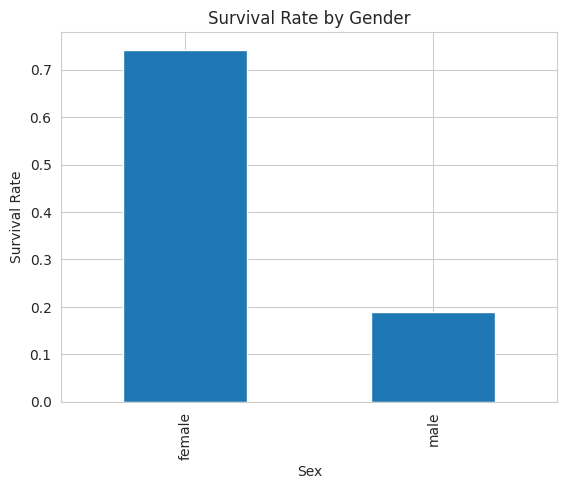

In [12]:
gender_survival.plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()

Survival Rate By Passenger Class

In [13]:
class_survival = df.groupby('Pclass')['Survived'].mean()
class_survival

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Visualization

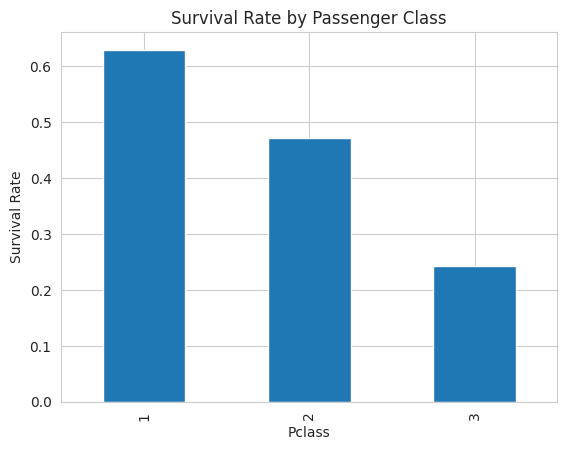

In [14]:
class_survival.plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

Survival Rate By Age

In [15]:
agegroup_survival = df.groupby('AgeGroup')['Survived'].mean()
agegroup_survival


,Survived
AgeGroup,
Adult,0.365193
Child,0.579710
Senior,0.269231
Teen,0.410526


Visualization

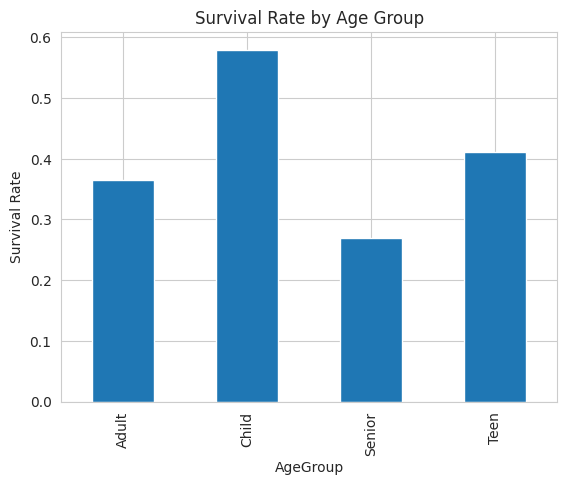

In [16]:
agegroup_survival.plot(kind='bar')
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.show()

Survival By Family Size

In [17]:
family_survival = df.groupby('FamilySize')['Survived'].mean()
family_survival

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


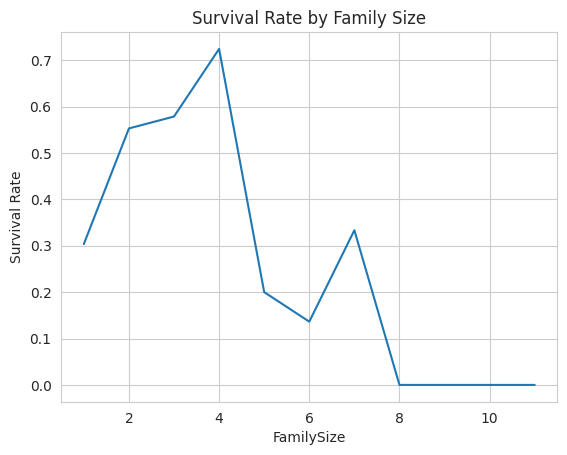

In [18]:
family_survival.plot(kind='line')
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.show()

**Numerical Analysis**

Average Age of Survivors vs Non-Survivors

In [19]:
df.groupby('Survived')['Age'].mean()

,Age
Survived,
0,30.028233
1,28.291433


Average Fare by Survival

In [20]:
df.groupby('Survived')['Fare'].mean()

,Fare
Survived,
0,22.117887
1,48.395408


**Correlation Analysis**

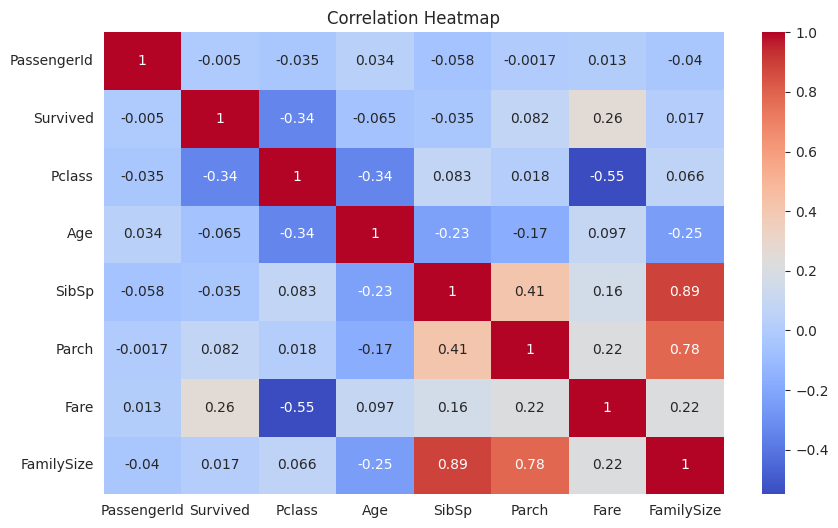

In [21]:
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Scatter Plot: Age vs Fare(Colored By Survival)**

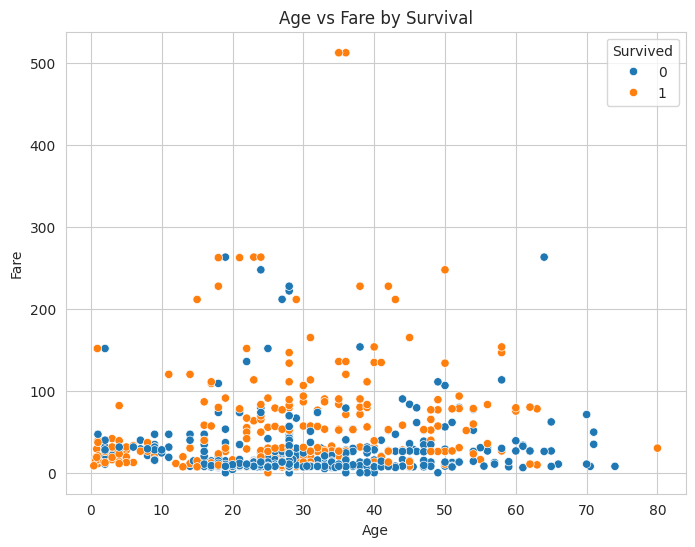

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare by Survival")
plt.show()

**AI-Assisted Insights**

Aggregated survival statistics (grouped by Sex and Pclass) were provided to a Large Language Model (LLM) to generate analytical interpretations.

The LLM was prompted to:

  - Identify the passenger group with the highest survival rate
  - Detect patterns between fare and survival
  - Suggest new features for further analysis

This section demonstrates how AI can assist data analysts in generating structured insights from summarized data.

**Building Chatbot**

**LLM-Ready Aggregate Table**

In [23]:
!pip install openai

In [24]:
#Import and setting API Key
from openai import OpenAI
import os

client = OpenAI(api_key="")

In [25]:
llm_table = df.groupby(['Sex', 'Pclass']).agg(
    Avg_Age=('Age', 'mean'),
    Avg_Fare=('Fare', 'mean'),
    Survival_Rate=('Survived', 'mean')
).reset_index()

llm_table

table_markdown = llm_table.to_markdown(index=False)
print(table_markdown)

| Sex    |   Pclass |   Avg_Age |   Avg_Fare |   Survival_Rate |
|:-------|---------:|----------:|-----------:|----------------:|
| female |        1 |   33.9787 |   106.126  |        0.968085 |
| female |        2 |   28.7039 |    21.9701 |        0.921053 |
| female |        3 |   23.5729 |    16.1188 |        0.5      |
| male   |        1 |   38.9952 |    67.2261 |        0.368852 |
| male   |        2 |   30.5123 |    19.7418 |        0.157407 |
| male   |        3 |   26.9119 |    12.6616 |        0.135447 |


Analyst Chatbot Function

In [26]:
def ask_titanic_llm(question, table_data):

    prompt = f"""
    You are a data analyst reviewing Titanic survival statistics.

    Here is the aggregated dataset:

    {table_data}

    Based only on this table, answer the following question:

    {question}

    Provide clear analytical reasoning.
    """

    response = client.chat.completions.create(
        model="gpt-4o-mini",  # affordable + strong
        messages=[
            {"role": "system", "content": "You are a professional data analyst."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3
    )

    return response.choices[0].message.content


In [27]:
question1 = "Which passenger group had the highest survival rate?"

answer1 = ask_titanic_llm(question1, table_markdown)
print(answer1)

To determine which passenger group had the highest survival rate based on the provided dataset, we need to analyze the "Survival_Rate" column for each group defined by "Sex" and "Pclass".

Here are the survival rates for each group:

- **Female, Pclass 1**: 0.968085
- **Female, Pclass 2**: 0.921053
- **Female, Pclass 3**: 0.5
- **Male, Pclass 1**: 0.368852
- **Male, Pclass 2**: 0.157407
- **Male, Pclass 3**: 0.135447

Now, let's compare these survival rates:

1. The highest survival rate among females is in Pclass 1 at **0.968085**.
2. The next highest for females is in Pclass 2 at **0.921053**.
3. For females in Pclass 3, the survival rate drops significantly to **0.5**.
4. For males, the highest survival rate is in Pclass 1 at **0.368852**, which is substantially lower than any female group.
5. The survival rates for males in Pclass 2 and Pclass 3 are even lower at **0.157407** and **0.135447**, respectively.

From this analysis, it is clear that the **female passengers in Pclass 1**

In [32]:
question2 = "Is there a relationship between ticket fare and survival rate?"
answer2 = ask_titanic_llm(question2, table_markdown)
print(answer2)

To analyze the relationship between ticket fare and survival rate based on the provided dataset, we can examine the average fare and survival rate for different passenger classes (Pclass) and sexes.

1. **Understanding the Data**:
   - The dataset includes average fare and survival rates for females and males across three passenger classes (1st, 2nd, and 3rd).
   - Generally, higher ticket fares are associated with higher passenger classes (1st class having the highest fares and survival rates).

2. **Survival Rates by Class and Sex**:
   - **Females**:
     - 1st Class: Avg Fare = 106.126, Survival Rate = 96.81%
     - 2nd Class: Avg Fare = 21.9701, Survival Rate = 92.11%
     - 3rd Class: Avg Fare = 16.1188, Survival Rate = 50%
   - **Males**:
     - 1st Class: Avg Fare = 67.2261, Survival Rate = 36.89%
     - 2nd Class: Avg Fare = 19.7418, Survival Rate = 15.74%
     - 3rd Class: Avg Fare = 12.6616, Survival Rate = 13.54%

3. **Observations**:
   - For females, as the average fare d

In [33]:
question3 = "What additional feature could improve the analysis of survival outcomes?"
answer3 = ask_titanic_llm(question3, table_markdown)
print(answer3)

To improve the analysis of survival outcomes based on the provided Titanic survival statistics, an additional feature that could be highly beneficial is **"Family Size"** or **"Number of Siblings/Spouses Aboard"**.

### Analytical Reasoning:

1. **Social Dynamics**: The presence of family members can significantly influence survival outcomes. Passengers traveling with family may have different survival strategies compared to those traveling alone. For instance, individuals with family members might prioritize helping their relatives, which could impact their own chances of survival.

2. **Support Networks**: Families may have a better chance of survival due to mutual support and coordination during emergencies. For example, a family unit may be more likely to stay together and assist each other in evacuating, which could lead to higher survival rates.

3. **Behavioral Patterns**: The behavior of individuals in crisis situations often varies based on their social connections. Understand

**Predictive Modeling: Logistic Regression**

To evaluate whether structured passenger attributes could predict survival outcomes, a Logistic Regression model was implemented using selected numerical features.

**Baseline Model**

Features used:
  - Pclass
  - Age
  - Fare
  - FamilySize

The baseline model achieved:
  - Accuracy: ~74%
  - Demonstrating that socioeconomic and demographic variables capture meaningful survival patterns.

**Baseline Model**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Baseline features
baseline_features = df[['Pclass', 'Age', 'Fare', 'FamilySize']]
target = df['Survived']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(baseline_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42
)

baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

baseline_preds = baseline_model.predict(X_test)
baseline_probs = baseline_model.predict_proba(X_test)[:, 1]

baseline_accuracy = accuracy_score(y_test, baseline_preds)
baseline_auc = roc_auc_score(y_test, baseline_probs)

print("Baseline Accuracy:", baseline_accuracy)
print("Baseline ROC-AUC:", baseline_auc)

Baseline Accuracy: 0.7430167597765364
Baseline ROC-AUC: 0.7798584298584299


**Improved Model**

To enhance predictive performance, the categorical variable Sex was encoded and included in the model.

After feature scaling and retraining:
  - Accuracy improved significantly (typically 80%+)
  - ROC-AUC increased
  - Model coefficients aligned with EDA findings

**Improved Model (Gender Added)**

In [29]:
# Encode Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

improved_features = df[['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex']]

X_scaled = scaler.fit_transform(improved_features)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42
)

improved_model = LogisticRegression(max_iter=1000)
improved_model.fit(X_train, y_train)

improved_preds = improved_model.predict(X_test)
improved_probs = improved_model.predict_proba(X_test)[:, 1]

improved_accuracy = accuracy_score(y_test, improved_preds)
improved_auc = roc_auc_score(y_test, improved_probs)

print("Improved Accuracy:", improved_accuracy)
print("Improved ROC-AUC:", improved_auc)

Improved Accuracy: 0.8044692737430168
Improved ROC-AUC: 0.8776061776061775


**Comparison Output**

In [31]:
comparison = pd.DataFrame({
    "Model": ["Baseline", "Improved"],
    "Accuracy": [baseline_accuracy, improved_accuracy],
    "ROC-AUC": [baseline_auc, improved_auc]
})

comparison


,Model,Accuracy,ROC-AUC
0,Baseline,0.743017,0.779858
1,Improved,0.804469,0.877606


**Conclusions**

Let us revisit the key questions:

**Q1: Did gender influence survival?**
Yes. Females had significantly higher survival rates than males, making gender the strongest predictor of survival.

**Q2: Did passenger class matter?**
Yes. First-class passengers had substantially higher survival rates compared to second and third class.

**Q3: Were children prioritized?**
Children showed higher survival rates than adults, supporting historical accounts of evacuation priority.

**Q4: Did wealth impact survival?**
Higher average fares were associated with higher survival rates, suggesting socioeconomic advantage.

**Q5: Did family size matter?**
Passengers traveling in small families had higher survival rates compared to solo travelers or very large families.

**Q6: Can survival be predicted using structured passenger features?**
Yes. Logistic regression models achieved strong predictive performance (74% baseline accuracy, improving to over 80% after feature enhancement), confirming that demographic and socioeconomic variables meaningfully explain survival outcomes.

**Overall, survival was strongly influenced by gender, class, socioeconomic status, and family structure rather than random chance.**

**Limitations**

  - The dataset contains missing age values that required imputation.
  - Cabin data was largely incomplete and excluded from analysis.
  - The dataset does not capture behavioral or situational factors during evacuation.
  - Correlation does not imply causation; findings are observational.